- The goal is to implement classic linear regression model to predict test score on student.

- We need to find the best optimized parameters b and w. 
    - To find the best, we use gradient decent formula. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


- Column 1: The amount of hours studied
- Column 2: The test scores students achieved

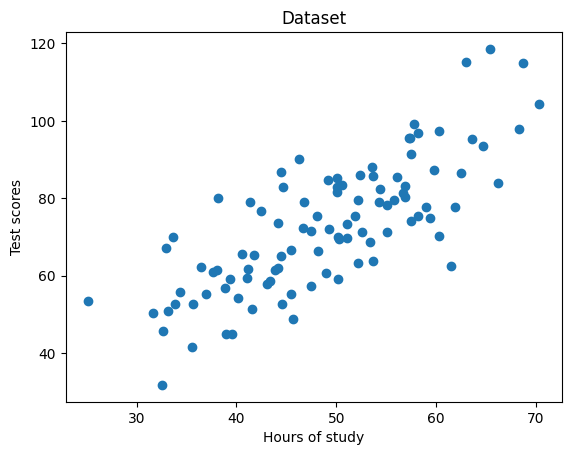

In [3]:
points = np.genfromtxt('data.csv', delimiter=',') # change top column to below column

#Extract columns
x = np.array(points[:,0]) # 1st column
y = np.array(points[:,1]) # 2nd column

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Step 1: Calculate loss fucntion
$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$

- where:
    - $f_{w,b}(x^{(i)})$ = $wx^{(i)} + b$ 
        - $w$ and $b$ are parameters first initialized with 0.
        - $x^{(i)}$ is dataset for each row.
        - $m$ is total training examples.

In [24]:
points.shape

(100, 2)

- This means our m = 100 (total training examples).

In [ ]:
# Loss function
def compute_loss(b, w, points):
    total_loss = 0
    N = float(len(points)) # 100

    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0] # each data row from column 1
        y = points[i, 1] # each data row from column 2
    
        # MSE loss over all samples 
        total_loss += ((w * x + b) - y) ** 2 # b, w = best value 

    #Return average of squared error
    return total_loss/(2*N)

- 1st iteration:
    - x = 32.50234527, y = 31.70700585

- 2nd iteration:
    - x = 53.42680403, y = 68.77759598

- 100th iteraiton:
    - x = 25.12848465, y = 53.45439421

- How did x and y get those values? `x = points[0,0], y = points[0,1]` (1st iteration):
    - `points[:5, :]` to see first 5 rows.

#### Step 2: Compute loss function with w and b respectively.


$$w = \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)}$$

- `w_gradient = (2/(2*N)) * ((w_current * x + b_current)-y) * x` 


$$b = \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)$$

- `b_gradient = (2/(2*N)) * ((w_current * x + b_current)-y)`



#### Step 3: Update parameters $w$ and $b$ with gradient descent:

$$w_{\text{new}} = w_{\text{current}} - \alpha \cdot \frac{\partial J(w, b)}{\partial w}$$

- `w = (w_current - a * w_gradient)`
    - where a = learning rate.

$$b_{\text{new}} = b_{\text{current}} - \alpha \cdot \frac{\partial J(w, b)}{\partial b}$$
- `w = (w_current - a * w_gradient)`
    - where a = learning rate.


In [27]:
def step_gradient(b_current, w_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(points))  # 100

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # w_gradient over all samples
        w_gradient +=  (1/N) * ((w_current * x + b_current)-y) * x 
        # b_gradient over all samples
        b_gradient +=  (1/N) * ((w_current * x + b_current)-y)

    #Update current m and b
    w_updated =   w_current - learning_rate * w_gradient
    b_updated =   b_current - learning_rate * b_gradient

    #Return updated parameters (lowest cost)
    return b_updated, w_updated

#### Step 4: Compute gradient descent function to iterate step 1 - 3 until convergence (point where cost reaches lowest point).

In [28]:
# Gradient Descent function
def gradient_descent(points, starting_b, starting_w, learning_rate, nuw_iterations):
    b = starting_b
    w = starting_w
    LogisticTransform_graph = []
    loss_graph = []

    #For every iteration, optimize b, w and compute its loss
    for i in range(num_iterations):
        loss_graph.append(compute_loss(b, w, points))  # points = (100,2)
        b, w = step_gradient(b, w, np.array(points), learning_rate)

    return [b, w, loss_graph]

#### Step 5: Train and Evaluate model

In [29]:
# Set parameters:
learning_rate = 0.0001
initial_b = 0
initial_w = 0
num_iterations = 15

In [30]:
b, w, loss_graph = gradient_descent(points, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized loss:', compute_loss(b, w, points))

Optimized b: 0.029123668706680532
Optimized w: 1.4588267697027604
Minimized loss: 56.82803001588782


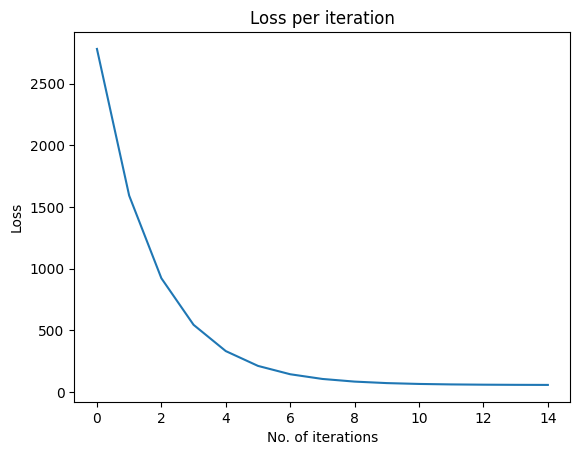

In [31]:
plt.plot(loss_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.show()

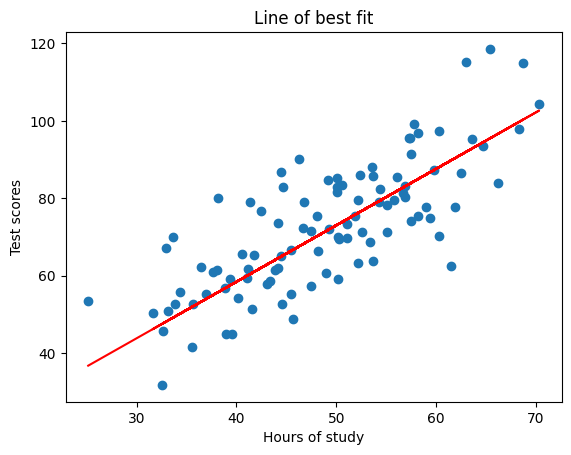

In [56]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = w * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()